In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

In [2]:
data=pd.read_csv("data_final.csv")
data.dtypes

App Name              object
Category              object
Rating               float64
Rating Count         float64
Installs               int64
Free                   int64
Price                float64
Size                 float64
Minimum Android       object
Developer Id          object
Last Updated          object
Content Rating        object
Ad Supported            bool
In App Purchases        bool
Editors Choice          bool
Year                   int64
Age                    int64
Days Since Update      int64
dtype: object

In [4]:
X=data.drop(columns=["App Name","Category","Minimum Android","Developer Id","Last Updated","Content Rating","Installs"])
y=data["Installs"]

In [5]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_train.shape, y_test.shape

((1642792,), (547598,))

In [8]:
mean_installs = data['Installs'].mean()
baseline_pred = [mean_installs] * len(y_test)

print(mean_absolute_error(baseline_pred, y_test))

329211.92246338195


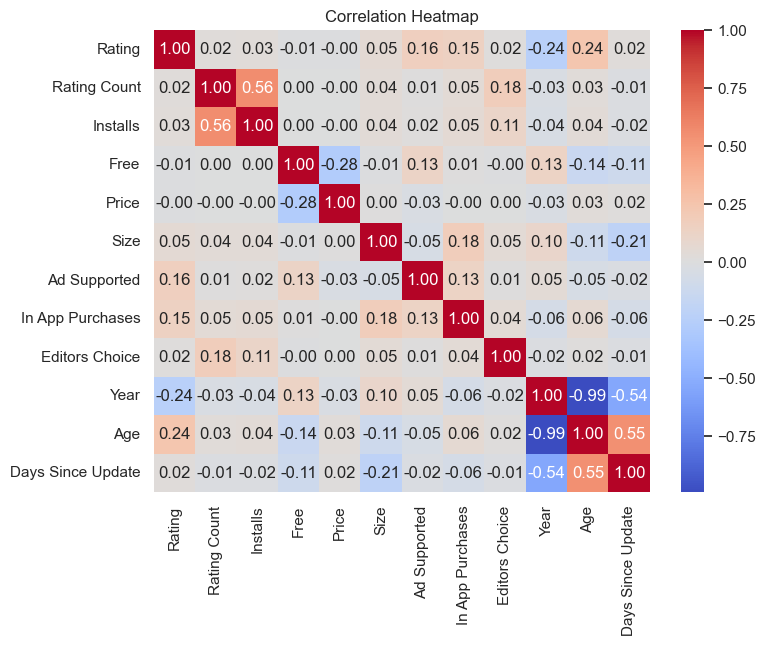

In [10]:
df=data.drop(columns=["App Name","Category","Minimum Android","Developer Id","Last Updated","Content Rating"])
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [14]:
from sklearn.ensemble import RandomForestRegressor
forest_base = RandomForestRegressor(n_estimators=50, max_depth=5).fit(X_train, y_train)
forest_base_test_predictions = forest_base.predict(X_test)
mean_absolute_error(y_test, forest_base_test_predictions)

np.float64(133633.32865507936)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pca = pca.fit(X_train)

pca

PCA(n_components=9)

In [16]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca.shape, X_test_pca.shape

((1642792, 9), (547598, 9))

In [ ]:
forest_pca = RandomForestRegressor(n_estimators=50, max_depth=5).fit(X_train_pca, y_train)
forest_pca_test_predictions = forest_pca.predict(X_test_pca)

mean_absolute_error(y_test, forest_pca_test_predictions)